## Business Statement: Using machine learning to predict Kickstarter success

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.

A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. 

The model will be used to predict the likelihood a kickstarter project will succeed or fail before its actual deadline. It will also search for any features that influence the success or failure of Kickstarter projects. That is why we are going to focus only on data whose state is 'successful' or 'failed'. <br>

The notebook is divided into 3 parts. In Part 1, we are going to clean data, visualize some patters, and perform data analysis. In part 2, we are going to prepare data for before modelling. In Part 3, we will create a simple model to predict, if a project is going to be successful or not based on chosen features.

In conclusion, we provide our findings and appilcation.

# Content

**Part 1 - Data cleaning and data insights<br>**
1.1. Setting up the required libraries and packages <br>
1.2. Dataset information <br>
1.3. Dataset preprocessing <br>
1.4. Univariate feature analysis and data exploration <br>

**Part 2 - Preparing the data for machine learning<br>**
2.1. Checking distributions<br>
2.2. Log transformation <br>
2.3. Encode the Categorical Features <br>
2.4. Set up data sample of 5000 observations <br>
2.5. Setting test/training size and the X and y variables <br>

**Part 3 - Modeling<br>**
3.1. Logistic Regression model<br>
3.1.1. Logistic Regression features of importance<br>
3.1.2. Evaluate performance of default model<br>
3.1.3. Logistic regression with parameter optimization<br>
3.1.4. Learning Curve<br>
3.1.5. Cross Validation<br>
3.1.6. New predictions with 0.4 threshold <br>
3.1.7. Evaluate performance of the best model<br>
3.2. Support Vector Machine (SVC)<br>
3.3. K-Nearest Neighbors (KNN)<br>
3.4. Random Forest (RF) <br>

**Conclusion**<br>

# Part 1

## 1.1. Setting up the required libraries and packages

In [1]:
# For data pre-processing and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pprint import pprint
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Models and model selection
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline, make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# For model analysis and metrics
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from statsmodels.graphics.factorplots import interaction_plot

%matplotlib inline
plt.style.use("seaborn-colorblind")

## 1.2. Dataset information

### Import dataset

In [2]:
# Using the 2018 data set
kick = pd.read_csv('ks-projects-201801.csv')

### Basic Tests and EDA on input data

In [3]:
#printing summary of the kickstarter data
#this will give the dimensions of data set : (rows, columns)
print(kick.shape)
#columns and data types
print(kick.info())
#basic stats of columns
print(kick.describe())
#number of unique values in all columns
print(kick.nunique())

(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ 

The above information helps us reaching the following conclusions:

- The data is at ID level (unique of ID=number of rows)<br>
- The numerical data fields are: goal, pledged, backers, usd_pledged, usd_pledged_real, usd_goal_real<br>

### Dataset information

**(1) Description of the variables** <br>
name : name of project<br>
main_category : category of campaign<br>
currency : currency used to support<br>
deadline : deadline for crowdfunding<br>
goal : fundraising goal<br>
launched : date launched<br>
pledged : amount pledged by crowd<br>
state : current condition the project is in<br>
backers : number of backers<br>
country : country pledged from<br>
usd pledged : amount of money pledged<br>
usd_pledged_real : conversion in US dollars of the pledged column<br>
usd_goal_real : conversion in US dollars of the goal column<br>

**(2) Understanding Variables in the Dataset:**<br>

The dataset has 15 variables including ID. Since ID is the level of the dataset, we can set it as the index of the data later. <br>

Variables like name, currency, deadline, launched date, and country are self-explanatory. Explanations of some key variables are as follows:<br>

- Main_Category: There are 15 main categories for the project. These main categories broadly classify projects based on  topic and genre they belong to.

- Category: Main Categories are further sub-divided into categories to give a more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.

- Number of Backers: These are number of people who have supported the project by pledging some amount.

- Goal: This is the goal amount that the company needs to raise to start it's project. The goal amount is an important variable for company because if it is set too high, the project may fail to raise that amount of money and be unsuccessful. If it is too low, then it may reach it's goal too soon and they loose out on potential backers. 

- Pledged: This is amount raised by the company through its backers. On Kickstarter, if total amount pledged is lower than goal, then the project is unsuccessful and the start-up company doesn’t receive any funds. If pledged amount is more than the goal, the company is considered successful. <br>

    Because there are many different currencies, they are converted to the amount of USD. <br>
    (a) usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter). <br>
    (b) usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API). <br>
    (c) usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).<br>

## 1.3. Dataset Preprocessing
In this section the data will be cleaned and pre-processed in order to allow for exploratory data analysis and modeling.
We perform some pre-processing in this step which includes the following:<br>

- Rename columns<br>
- Handle Missing Values <br>
- Set index <br>
- Additional calculated features <br>
- Review the target variable: state <br>
- Input variable selection
- Encode the Categorical Features <br>

### Rename columns

Renaming column so that there is no '_' in the actual dataset variable name

In [4]:
kick.columns = kick.columns.str.strip()
print(kick.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [5]:
kick.rename(columns={"usd pledged":"usdPledged", "main_category":"mainCategory",'usd_pledged_real':'usdPledgedReal','usd_goal_real':'usdGoalReal'},inplace=True)
kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              378661 non-null  int64  
 1   name            378657 non-null  object 
 2   category        378661 non-null  object 
 3   mainCategory    378661 non-null  object 
 4   currency        378661 non-null  object 
 5   deadline        378661 non-null  object 
 6   goal            378661 non-null  float64
 7   launched        378661 non-null  object 
 8   pledged         378661 non-null  float64
 9   state           378661 non-null  object 
 10  backers         378661 non-null  int64  
 11  country         378661 non-null  object 
 12  usdPledged      374864 non-null  float64
 13  usdPledgedReal  378661 non-null  float64
 14  usdGoalReal     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Drop missing values

In [6]:
# get the number of missing data points per column
missing_values_count = kick.isnull().sum()
print(missing_values_count)

ID                   0
name                 4
category             0
mainCategory         0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usdPledged        3797
usdPledgedReal       0
usdGoalReal          0
dtype: int64


In [7]:
# how many total missing values do we have?
total_cells = np.product(kick.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print ("{:.2%}".format(total_missing/total_cells*100))

6.69%


In [8]:
# remove all the rows that contain a missing value
kick.dropna(inplace=True)
kick.describe()
kick.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              374860 non-null  int64  
 1   name            374860 non-null  object 
 2   category        374860 non-null  object 
 3   mainCategory    374860 non-null  object 
 4   currency        374860 non-null  object 
 5   deadline        374860 non-null  object 
 6   goal            374860 non-null  float64
 7   launched        374860 non-null  object 
 8   pledged         374860 non-null  float64
 9   state           374860 non-null  object 
 10  backers         374860 non-null  int64  
 11  country         374860 non-null  object 
 12  usdPledged      374860 non-null  float64
 13  usdPledgedReal  374860 non-null  float64
 14  usdGoalReal     374860 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [9]:
#segregating the variables as categorical and continuous
cat_vars=[ 'category', 'mainCategory', 'currency','country']
cont_vars=['goal', 'pledged', 'backers','usdPledged','usdPledgedReal','usdGoalReal']

In [10]:
#correlation of continuous variables
kick[cont_vars].corr()

,goal,pledged,backers,usdPledged,usdPledgedReal,usdGoalReal
goal,1.000000,0.007327,0.003969,0.005534,0.005072,0.942691
pledged,0.007327,1.000000,0.717858,0.857370,0.952736,0.004992
backers,0.003969,0.717858,1.000000,0.697426,0.753449,0.004476
usdPledged,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usdPledgedReal,0.005072,0.952736,0.753449,0.907743,1.000000,0.005566
usdGoalReal,0.942691,0.004992,0.004476,0.006172,0.005566,1.000000


The goal amount of funding for each project is currently recorded in native currencies. In order to allow for fair comparisons between projects, goals will be converted into dollars (as amount pledged already is).

### Setting the index
The ID will now be set as the index.

In [11]:
# Setting the id column as the index
kick.set_index('ID', inplace=True)
kick.head(3)

,name,category,mainCategory,currency,deadline,goal,launched,pledged,state,backers,country,usdPledged,usdPledgedReal,usdGoalReal
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


### Additional calculated features

Additional features can be calculated from the existing features, which may also help to predict whether a project is successfully funded. The features to be added are: time from creation to launch, campaign length, launch month, launch year, launch season. Original datetime values will be kept in for now for EDA purposes, but will be removed later, before modeling.

In [12]:
# Calculating the length of campaign
kick["deadline"] = pd.to_datetime(kick["deadline"], dayfirst=True, errors='coerce')
kick["launched"] = pd.to_datetime(kick["launched"], dayfirst=True, errors='coerce')
kick['duration'] = (kick['deadline'] - kick['launched']).dt.days+1
kick['yearlaunched'] = kick['launched'].dt.year
kick['monthlaunched'] = kick['launched'].dt.month

In [13]:
kick[kick['duration'] < 0]

,name,category,mainCategory,currency,deadline,goal,launched,pledged,state,backers,country,usdPledged,usdPledgedReal,usdGoalReal,duration,yearlaunched,monthlaunched
ID,,,,,,,,,,,,,,,,,


We check the duration for negative numbers, this would indicate the deadlin/goal date is before the start date. We don't have any problems with these, so we'll move on.

### Review the target variable: state

In [14]:
# Our dataset has several states for projects, let's see what they are 
states = kick.state.unique()
states

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

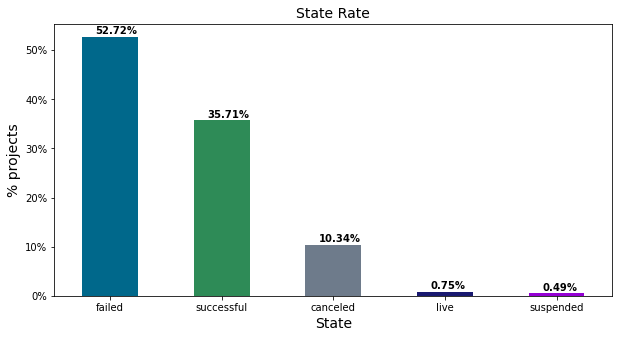

In [15]:
# Let's examine the percentage of projects by 'state'

colors = ['#00688B','#2E8B57', '#6E7B8B','#191970','#9400D3']
ax = (kick['state'].value_counts()*100.0 /len(kick)).plot(kind='bar',stacked = True, rot = 0, color = colors, figsize = (10,5))                                                                        
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% projects',size = 14)
ax.set_xlabel('State',size = 14)
ax.set_title('State Rate', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.12, i.get_height()+0.6, \
            str(round((i.get_height()/total*10/4), 2))+'%',
            fontsize=10,
            color='black',
            weight = 'bold',
            size = 10)

Based on the above chart, we can observe non-uniform distribution of the states. There are 5 states, where failed and successful in total contain 88.43% of all projects. 

The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them.

For further analysis, we will keep only these two classes.

### Set up dataset to solve business statement: failed and successful

**kick1**: where the 'state' is only successful or failed

In [16]:
# select the rows where 'state' is only equal to 'failed', and 'successful'
is_fail_canx_succ = kick['state'].isin(['failed', 'successful'])

kick1 = kick[is_fail_canx_succ]

In [17]:
kick1.state.unique()

array(['failed', 'successful'], dtype=object)

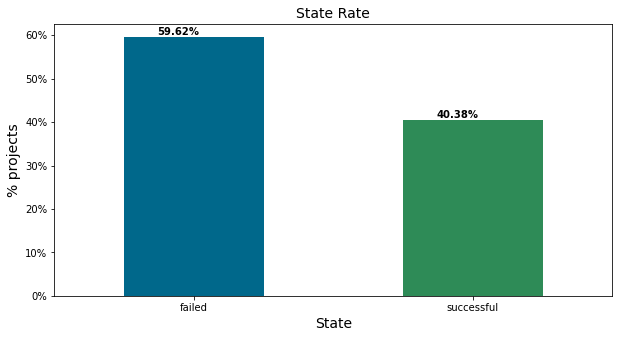

In [18]:
colors = ['#00688B','#2E8B57']
ax = (kick1['state'].value_counts()*100.0 /len(kick1)).plot(kind='bar',stacked = True, rot = 0, color = colors, figsize = (10,5))                                                                        
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% projects',size = 14)
ax.set_xlabel('State',size = 14)
ax.set_title('State Rate', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.12, i.get_height()+0.6, \
            str(round((i.get_height()/total), 2))+'%',
            fontsize=10,
            color='black',
            weight = 'bold',
            size = 10)

After removing two states, we end up with balanced binary classification problem, with failed (60%) and successful (40%).

#### We will remove features that are leaking our label so that our classifier will be able to predict success of project right after it's launch. We end up with following features:

**kick1:** The columns which were kept or calculated were:

- The project goal (in USD) <br>
- Campaign length — number of days from launch to deadline<br>
- Main Category (one-hot encoded)<br>
- Country (one-hot encoded)<br>
- The number of backers<br>
- Month a project was launched in <br>
- Season a project was launched in <br>
- Year a project was launched in <br>

### Variable selection

In [19]:
# Drop the unecessary variables and store the it in a new df 'kick'
kick2 = kick1.drop(['name', 'category', 'goal','pledged','usdPledged','deadline'], axis = 1)
kick2.head()
kick2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 1000002330 to 999988282
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   mainCategory    331462 non-null  object        
 1   currency        331462 non-null  object        
 2   launched        331462 non-null  datetime64[ns]
 3   state           331462 non-null  object        
 4   backers         331462 non-null  int64         
 5   country         331462 non-null  object        
 6   usdPledgedReal  331462 non-null  float64       
 7   usdGoalReal     331462 non-null  float64       
 8   duration        331462 non-null  int64         
 9   yearlaunched    331462 non-null  int64         
 10  monthlaunched   331462 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 30.3+ MB


## 1.4. Univariate feature analysis and data exploration

Univariate analysis is one of the simplest forms of statistical analysis. As it is suggested from the name, it looks at only one variable and is often used to describe population, or the things that can be looked at include things like frequencies and distrubution of the data.

#### Preliminary exploration

How many projects got funded successfullly? <br>
How much is the goal? Can we/should we decompose the goal into bins or use the numerical value? <br>
Are there any correlations between the currency and the status of funded projects? (ie. Is USD more favorable?) <br>
Are there any correlations between the country and the status of funded projects? (ie. Is a project in the US more likely to be funded?) <br>
Distribution of funded/not funded projects over years/months?

In [20]:
print("Key statistical analysis:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(kick2.usdGoalReal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(kick2.usdPledgedReal.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(kick2.loc[kick2['state'] == 'successful'].usdPledgedReal)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(kick2)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(kick2.loc[kick2['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(kick2.loc[kick2['state'] == 'successful'])/len(kick2))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(kick2.usdGoalReal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(kick2.usdPledgedReal.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(kick2.loc[kick2['state'] == 'successful'].usdPledgedReal.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(kick2.loc[kick2['state'] == 'failed'].usdPledgedReal.mean()))
      
print("\nThe mean number of days a campaign is run for is", int(round(kick2.duration.mean(),2)))
print('The mean number of days a campaign for failed projects: {0}'
      .format(round(kick2[kick2['state'] == 'failed']['duration'].mean(), 2)))
print('The mean number of days a campaign for successful projects: {0}'
      .format(round(kick2[kick2['state'] == 'successful']['duration'].mean(), 2)))

Key statistical analysis:

The total amount of money that projects have aimed to raise is $13,763,248,691
The total amount of money pledged by backers is $3,294,728,541
The total amount of money pledged by backers to successful projects is $3,033,664,091

The total number of successful or failed projects launched on Kickstarter is: 331,462
The total number of projects which were successfully funded is: 133,851
The proportion of completed projects which were successfully funded is: 40%

The mean project fundraising goal is $41,523
The mean amount pledged per project is $9,940
The mean amount pledged per successful project is $22,664
The mean amount pledged per failed project is $1,321

The mean number of days a campaign is run for is 33
The mean number of days a campaign for failed projects: 35.17
The mean number of days a campaign for successful projects: 32.16


### How do succesful and failed projects differ?

The graphs below show how various features differ between failed and successful projects.

- Unsurprisingly, successful projects tend to have smaller (and therefore more realistic) goals - the median amount sought by successful projects is about half that of failed projects. <br>
- The differences in the median amount pledged per project are more surprising. The median amount pledged per successful project is considerably higher than the median amount requested, suggesting that projects that meet their goal tend to go on to gain even more funding, and become 'over-funded'.<br>
- Longer projects are not necessarily better. Successful projects have slightly shorter durations. Actually, Kickstarter also noticed it and at some point limited their projects durations to up to 60 days. Project duration of 32-35 days is optimal - on the bottom right graph we can see the percent of projects funded as a function of their duration.<br>


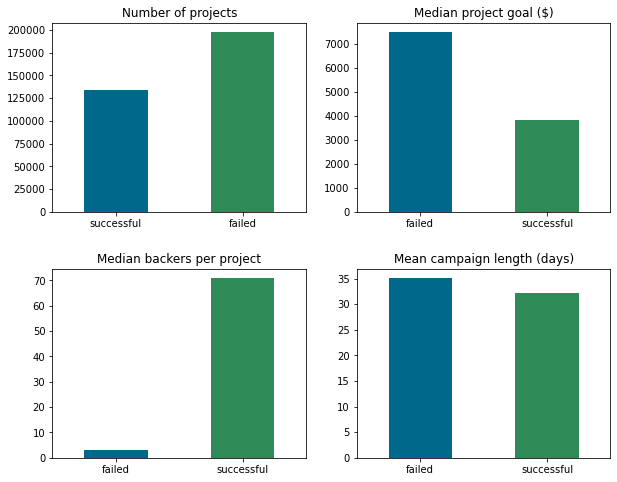

In [21]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))
colors1 = ['#00688B','#2E8B57']

kick2['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=colors1, rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

kick2.groupby('state').usdGoalReal.median().plot(kind='bar', ax=ax2, color=colors1, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

kick2.groupby('state').backers.median().plot(kind='bar', ax=ax3, color=colors1, rot=0)
ax3.set_title('Median backers per project')
ax3.set_xlabel('')

kick2.groupby('state').duration.mean().plot(kind='bar', ax=ax4, color=colors1, rot=0)
ax4.set_title('Mean campaign length (days)')
ax4.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

### How has fundraising changed over time?

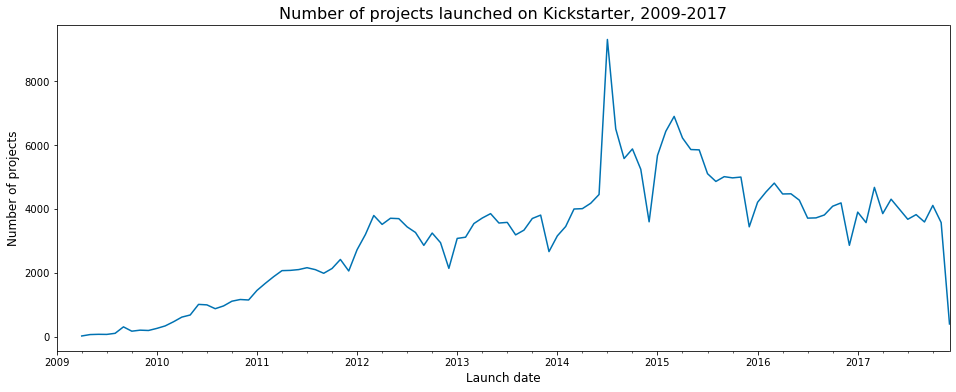

In [22]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
kick2.set_index('launched').mainCategory.resample('MS').count().plot()
plt.xlim('2009-01-01', '2017-12-31') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2017', fontsize=16)
plt.show()

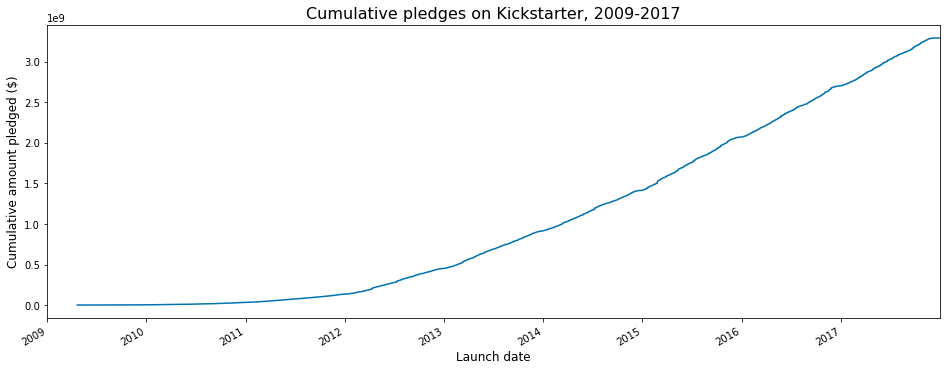

In [23]:
# Plotting the cumulative amount pledged on Kickstarter
plt.figure(figsize=(16,6))
kick2.set_index('launched').sort_index().usdPledgedReal.cumsum().plot()
plt.xlim('2009-01-01', '2017-12-31') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Cumulative amount pledged ($)', fontsize=12)
plt.title('Cumulative pledges on Kickstarter, 2009-2017', fontsize=16)
plt.show()

In [24]:
print("Average amount pledged per project in each year, in $:")
print(round(kick2.set_index('launched').usdPledgedReal.resample('YS').mean(),2))

Average amount pledged per project in each year, in $:
launched
2009-01-01     2375.54
2010-01-01     3041.30
2011-01-01     4256.16
2012-01-01     8247.53
2013-01-01    11328.24
2014-01-01     8419.59
2015-01-01    10058.20
2016-01-01    12889.88
2017-01-01    13564.59
Freq: AS-JAN, Name: usdPledgedReal, dtype: float64


The table and graph show the total and distribution of pledged real amounts in usd for each year 2009-2017. Again, the trend can be split into two phases, with a change in 2014. From 2014 onwards, there was greater variation in the amounts pledged, with lower median amounts than the period 2009-2014, but generally higher mean amounts (with the exception of 2013) due to some very large projects.

In [25]:
print("Average fundraising goal per project in each year, in $:")
print(round(kick2.set_index('launched').usdGoalReal.resample('YS').mean(),2))

Average fundraising goal per project in each year, in $:
launched
2009-01-01     6799.51
2010-01-01    13270.06
2011-01-01     9715.96
2012-01-01    17862.74
2013-01-01    24952.74
2014-01-01    47344.37
2015-01-01    70094.51
2016-01-01    53006.96
2017-01-01    39073.18
Freq: AS-JAN, Name: usdGoalReal, dtype: float64


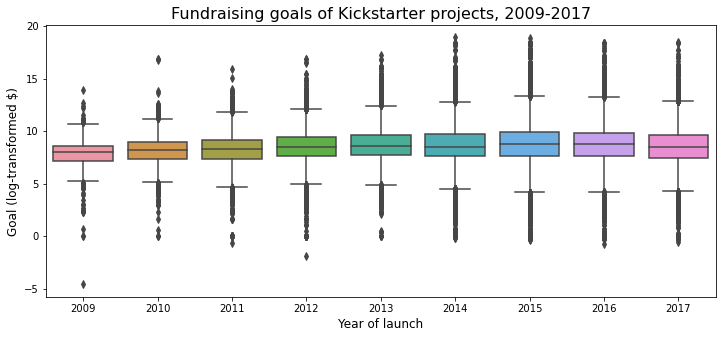

In [26]:
# Plotting the distribution of goal amounts each year
plt.figure(figsize=(12,5))
sns.boxplot(kick2.yearlaunched, np.log(kick2.usdGoalReal))
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Goal (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Fundraising goals of Kickstarter projects, 2009-2017', fontsize=16)
plt.show()

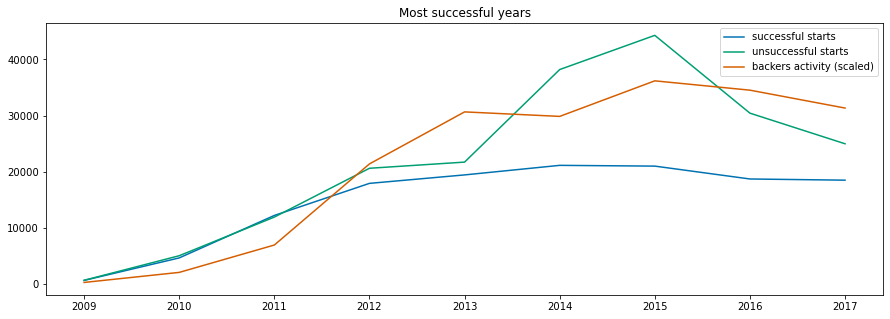

In [27]:
successfull_years = kick2[kick2['state'] == 'successful']['yearlaunched'].value_counts().rename('successful starts').sort_index()
unsuccessfull_years = kick2[kick2['state'] != 'successful']['yearlaunched'].value_counts().rename('unsuccessful starts').sort_index()
most_successful_years = pd.concat([successfull_years, unsuccessfull_years], axis=1, join='inner')
most_successful_years['backers activity (scaled)'] =kick2.groupby('yearlaunched').aggregate(lambda x:x.sum()/200)['backers']
most_successful_years.plot(figsize=(15, 5), legend=True, title='Most successful years')

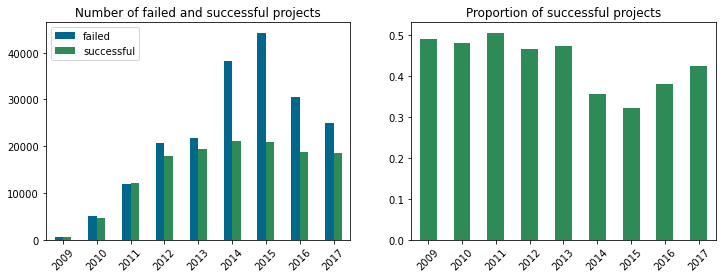

In [28]:
# Creating a dataframe grouped by year with columns for failed and successful
year_df = kick2.set_index('launched').state
year_df = pd.get_dummies(year_df).resample('YS').sum()

# Plotting the number and proportion of failed and successful projects each year
fig, ax = plt.subplots(1,2, figsize=(12,4))

year_df.plot.bar(ax=ax[0], color=colors1)
ax[0].set_title('Number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009,2020)), rotation=45)

year_df.div(year_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax[1], color='#2E8B57') # Normalizes counts across rows
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2020)), rotation=45)

plt.show()

The graph above shows the number and proportion of failed and successful projects each year. Once again, there is a change from 2014. From 2009 to 2013, each year about 50% of projects were successful. However, this decreased from 2014, although since then it has mostly been rising again.

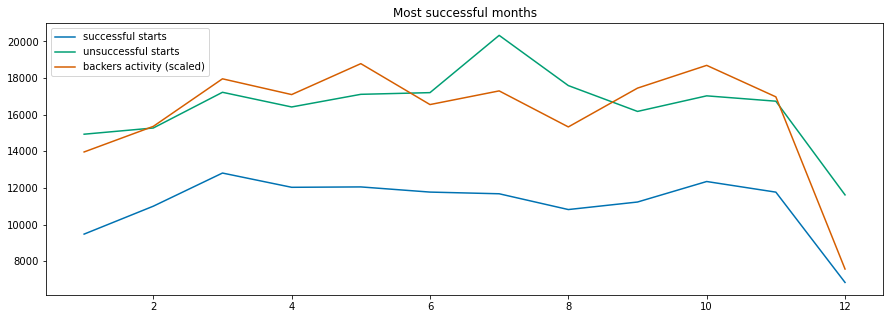

In [29]:
successfull_months = kick2[kick2['state'] == 'successful']['monthlaunched'].value_counts().rename('successful starts').sort_index()
unsuccessfull_months = kick2[kick2['state'] != 'successful']['monthlaunched'].value_counts().rename('unsuccessful starts').sort_index()
most_successful_months = pd.concat([successfull_months, unsuccessfull_months], axis=1, join='inner')
most_successful_months['backers activity (scaled)'] =kick2.groupby('monthlaunched').aggregate(lambda x:x.sum()/200)['backers']
most_successful_months.plot(figsize=(15, 5), legend=True, title='Most successful months')

### What types of projects do people launch and which are more successful?

- There are 15 project categories, of which film & video is the most common, followed by music, publishing, technology, and art. <br>
- Technology projects have the highest goals by far (in terms of their median goal size), followed by food (e.g. funding for restaurants), with other categories generally much smaller in terms of their funding goals.<br>
- However, technology projects are towards the bottom of the leaderboard in terms of the median amount actually pledged.<br>
- Games, comics, dance and design projects obtain the greatest amount of funding, on average (median).<br>
- The most frequently succesful categories are comics and dance (probably at least partly due to their relatively small funding goals), while the least successful are food, journalism and technology (again, probably because of their large funding goals).<br>
- Comics and games tend to attract the most backers, but each backer tends to pledge less.<br>
- Film & video, music, and technology tend to have longer campain duration.

In [30]:
# What are the main_category values?
mainCategories = kick2.mainCategory.unique()
mainCategories

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

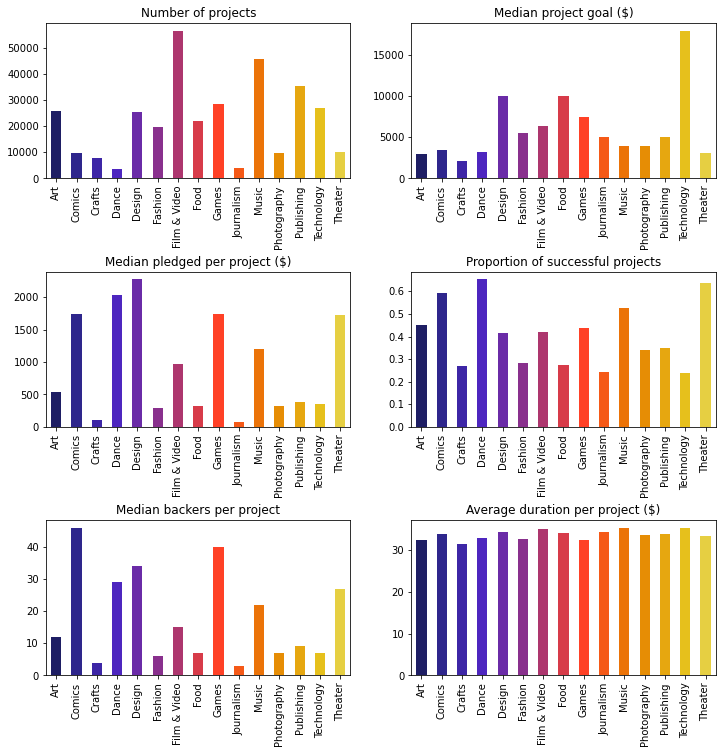

In [31]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(kick2.set_index('mainCategory').state).groupby('mainCategory').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

color = cm.CMRmap(np.linspace(0.1,0.8,kick2.mainCategory.nunique()))

kick2.groupby('mainCategory').mainCategory.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

kick2.groupby('mainCategory').usdGoalReal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

kick2.groupby('mainCategory').usdPledgedReal.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) 
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

kick2.groupby('mainCategory').backers.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

kick2.groupby('mainCategory').duration.mean().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Average duration per project ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

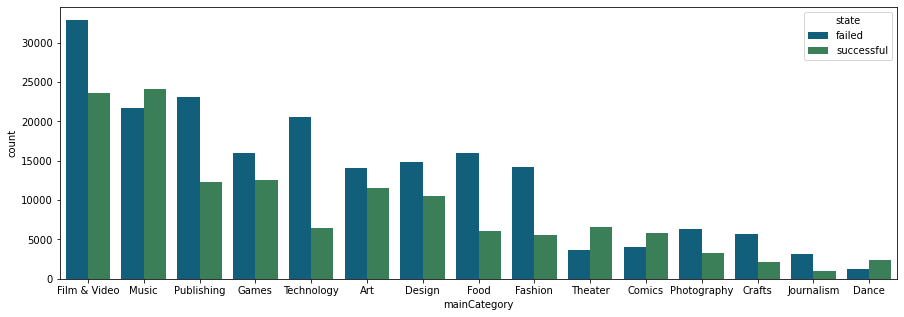

In [32]:
# Make a countplot of the categories and group them by state
colors1 = ['#00688B','#2E8B57']
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x='mainCategory', data=kick2, hue='state', 
              order=pd.value_counts(kick1['mainCategory']).index, palette = colors1);

### Distribution of Countries

Distribution of Countries: Top 15

The US leads with number of kickstarters, followed by Great Britain, Canada, and Australia.

In [33]:
# I want to know which countries the kickstarter projects encompass
# We'll make a list of unique values in the 'country' column
Countries = kick2.country.unique()
Countries

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'JP'],
      dtype=object)

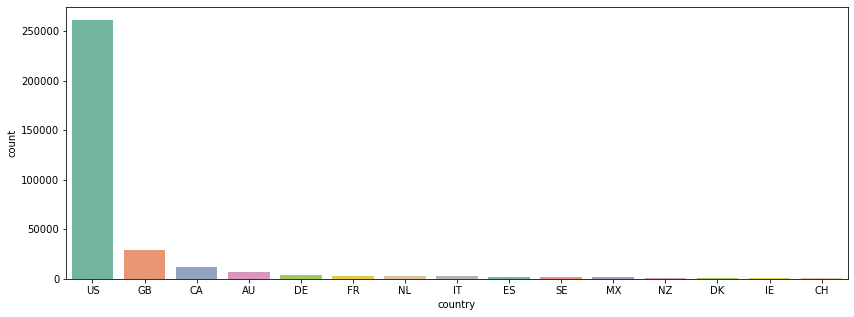

In [34]:
# Make a countplot of each country
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.countplot(x='country', data=kick1, 
              order=pd.value_counts(kick2['country']).iloc[:15].index, palette="Set2");

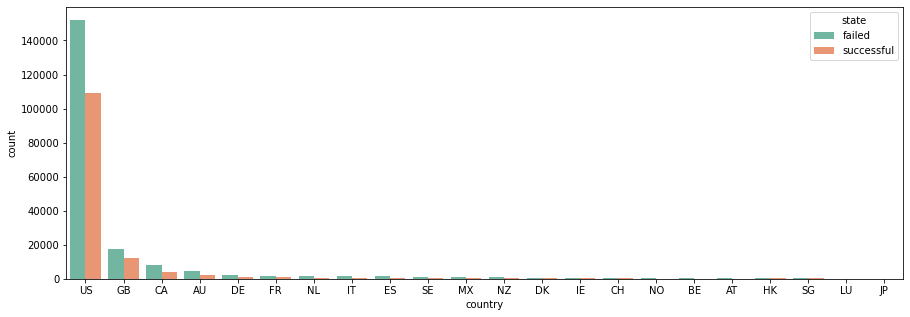

In [35]:
# Now to separate the countries by 'state'
colors1 = ['#00688B','#2E8B57']
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x='country', data=kick2, hue='state', 
              order=pd.value_counts(kick2['country']).index, palette = 'Set2');

### Distribution of Currency

Top Currencies are USD, GB(Pounds), Canadanian Dollars, Euros, and Australian Dollars. The English speaking world seems to dominate Kickstarter

In [36]:
# I want to know what the unique currencies are
Currencies = kick2.currency.unique()
Currencies

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

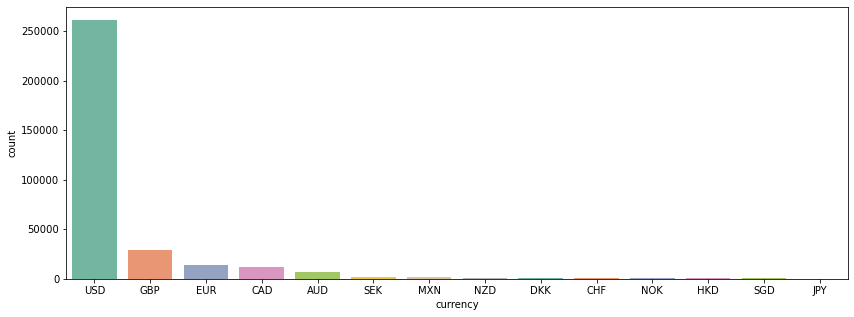

In [37]:
# Make a countplot for each currency
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.countplot(x='currency', data=kick2, 
              order=pd.value_counts(kick2['currency']).iloc[:15].index, palette="Set2");

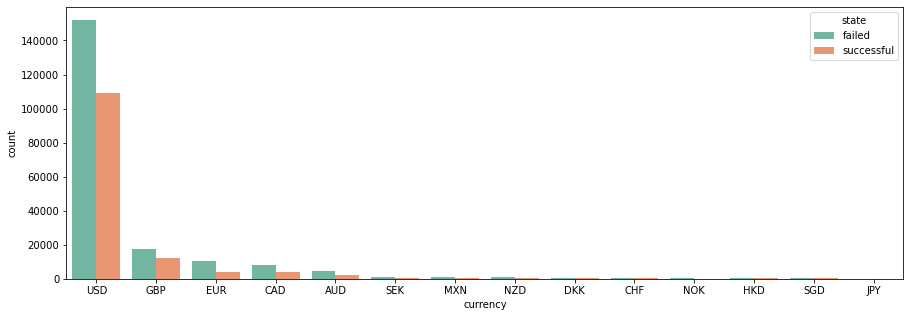

In [38]:
# Separate currency by 'state'
colors1 = ['#00688B','#2E8B57']
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x='currency', data=kick2, hue='state', 
              order=pd.value_counts(kick2['currency']).index, palette = 'Set2');

We will use usdGoalReal which is a dollar equivalent of the goal, as the dataset contains different currencies for project. In order to make the same currency, usdGoalReal will be used.

For a continuous variable we can generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding missing values. For numeric data, the result's index will include count, mean, std, min, max as well as lower, 50th, and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50th percentile is the same as the median.

# Part 2: Preparing the data for machine learning

Some features were initially retained for exploratory data analysis (EDA) purposes, but were then dropped in order to use machine learning models. These included features that are related to outcomes (e.g. the amount pledged) rather than related to the properties of the project itself (e.g. category, goal, length of campaign).

Country can be explained by Currency i.e. Euro is used by European countries, Pounds for Great Britain, Dollar in USA, etc.

## 2.1. Checking distributions

Most continuous numerical features other than blurb_length and campaign_days are heavily positively skewed. This is not an issue for some machine learning models, so these features will not be log-transformed for the first few models. After that, models will be re-run using log-transformed data, to see whether this improves model accuracy. <br>

We can easily observe that the number of backers are different for failed and successful, we suspect this variable will be good for classification.

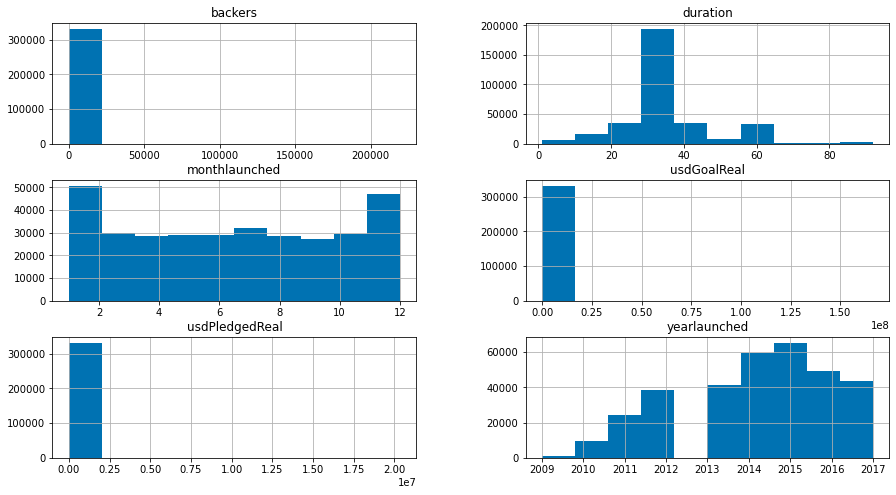

In [39]:
kick2[kick2.describe().columns].hist(figsize=(15,8));

## 2.2. Log transform
Based on the log statistics, we can observe that goal is highly skewed i.e. difference between 75% percentile and max value is very high. <br>
Distribution of the goal variable. We can observe goal is highly skeweed to the right. Log transformation can solve the outlier problem.

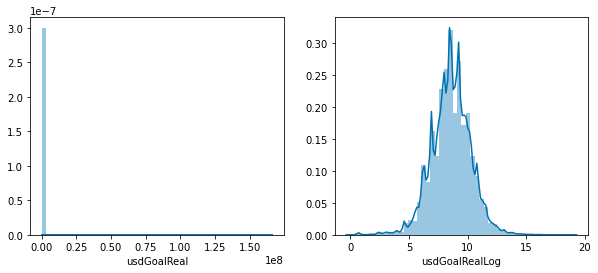

In [40]:
kick2['usdGoalRealLog'] = np.log1p(kick2.usdGoalReal)
# View the original usdGoalReal and the log-transformed one
dims = (10, 4)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(kick2.usdGoalReal, ax=ax1)
sns.distplot(kick2.usdGoalRealLog, ax=ax2);

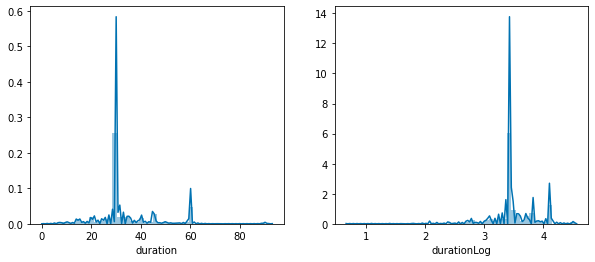

In [41]:
kick2['durationLog'] = np.log1p(kick2.duration)
# View the original usdGoalReal and the log-transformed one
dims = (10, 4)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(kick2.duration, ax=ax1)
sns.distplot(kick2.durationLog, ax=ax2);

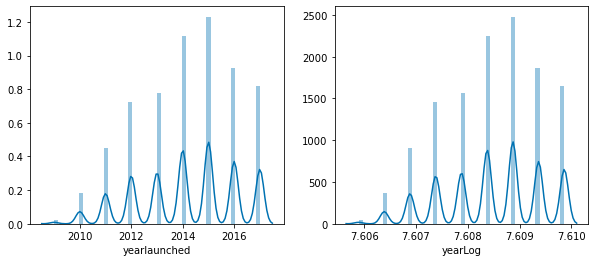

In [42]:
kick2['yearLog'] = np.log1p(kick2.yearlaunched)
# View the original usdGoalReal and the log-transformed one
dims = (10, 4)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(kick2.yearlaunched, ax=ax1)
sns.distplot(kick2.yearLog, ax=ax2);

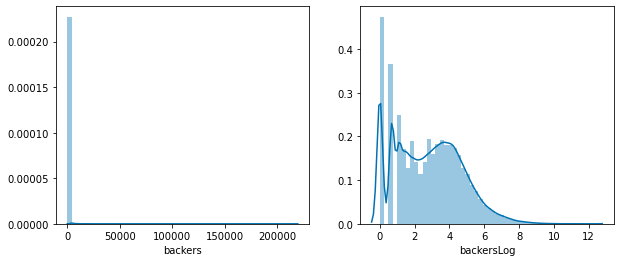

In [43]:
kick2['backersLog'] = np.log1p(kick2.backers)
# View the original 'backers' and the log-transformed one, 'backersLog'
dims = (10, 4)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(kick2.backers, ax=ax1)
sns.distplot(kick2.backersLog, ax=ax2);

### Examining 'backers' variable

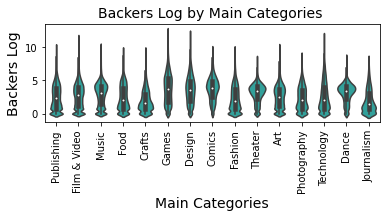

In [44]:
plt.subplot(212)
g1 = sns.violinplot(x='mainCategory',y='backersLog', 
                   color='#20B2AA', data=kick2)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Backers Log by Main Categories ", fontsize=14)
g1.set_xlabel("Main Categories", fontsize=14)
g1.set_ylabel("Backers Log", fontsize=14)

plt.show()

Text(0, 0.5, 'Backers Log')

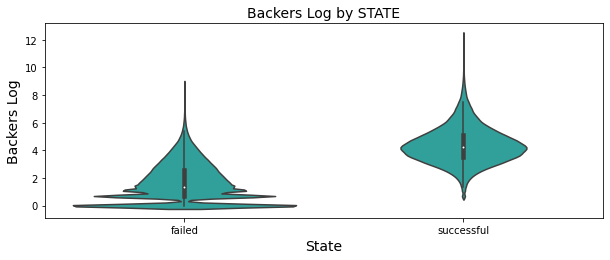

In [45]:
# Backers by 'state'
plt.figure(figsize = (10,10))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(211)
g = sns.violinplot(x='state',y='backersLog',
                   color='#20B2AA', data=kick2)
g.set_title("Backers Log by STATE", fontsize=14)
g.set_xlabel("State", fontsize=14)
g.set_ylabel("Backers Log", fontsize=14)

As we can easily observe that the number of backers are different for failed and successful, we suspect this variable will be good for classification.

## 2.3. Encode the Categorical Features
For the categorical variables: mainCategory, currency, and country, <br>
We'll need to convert them into integers so our model can use the data. For this we'll use scikit-learn's LabelEncoder. <br>
This assigns an integer to each value of the categorical feature.

In [46]:
kick3 = kick2[['state','mainCategory', 'currency', 'usdGoalRealLog', 
               'backersLog','durationLog', 'yearLog', 'monthlaunched']]
kick3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 1000002330 to 999988282
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state           331462 non-null  object 
 1   mainCategory    331462 non-null  object 
 2   currency        331462 non-null  object 
 3   usdGoalRealLog  331462 non-null  float64
 4   backersLog      331462 non-null  float64
 5   durationLog     331462 non-null  float64
 6   yearLog         331462 non-null  float64
 7   monthlaunched   331462 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 32.8+ MB


In [47]:
kick3 = pd.get_dummies(kick3, drop_first=True)
kick3.corr()

,usdGoalRealLog,backersLog,durationLog,yearLog,monthlaunched,state_successful,mainCategory_Comics,mainCategory_Crafts,mainCategory_Dance,mainCategory_Design,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
usdGoalRealLog,1.000000,0.125528,0.229766,0.056580,0.015098,-0.224605,-0.057453,-0.086116,-0.029242,0.089710,...,0.048267,-0.038965,0.007195,0.000801,-0.024857,-0.001292,-0.006358,-0.001747,-0.003663,0.010011
backersLog,0.125528,1.000000,-0.012637,-0.046159,0.003523,0.703686,0.085049,-0.070342,0.016418,0.120607,...,-0.044988,-0.014428,0.007388,-0.000010,-0.029542,-0.012866,-0.005207,-0.005614,0.004903,0.062879
durationLog,0.229766,-0.012637,1.000000,-0.137034,-0.013133,-0.112839,0.003361,-0.029737,-0.011658,0.017053,...,0.016429,-0.050792,0.001277,-0.002980,0.013113,0.003659,-0.011375,-0.001458,-0.004997,0.027056
yearLog,0.056580,-0.046159,-0.137034,1.000000,-0.090688,-0.073962,0.023863,0.064875,-0.024912,0.090760,...,0.190457,0.118577,0.051232,0.012163,0.089478,0.031414,0.034191,0.053303,0.048759,-0.300203
monthlaunched,0.015098,0.003523,-0.013133,-0.090688,1.000000,-0.010389,-0.002971,0.002597,-0.003755,0.018810,...,0.028687,-0.007171,0.010845,0.009242,0.005666,0.001782,0.007130,0.004152,0.014362,-0.026011
state_successful,-0.224605,0.703686,-0.112839,-0.073962,-0.010389,1.000000,0.067008,-0.042221,0.053301,0.007099,...,-0.057984,0.003745,0.003792,-0.001689,-0.016413,-0.010725,-0.006605,-0.009167,-0.000887,0.056574
mainCategory_Comics,-0.057453,0.085049,0.003361,0.023863,-0.002971,0.067008,1.000000,-0.027240,-0.018295,-0.050449,...,-0.021342,-0.005845,-0.004313,-0.001460,-0.003829,-0.000570,-0.006585,-0.005263,-0.003133,0.016084
mainCategory_Crafts,-0.086116,-0.070342,-0.029737,0.064875,0.002597,-0.042221,-0.027240,1.000000,-0.016224,-0.044739,...,-0.001233,0.006939,-0.000656,-0.001295,0.007243,-0.000345,0.001591,-0.000765,0.007145,-0.009809
mainCategory_Dance,-0.029242,0.016418,-0.011658,-0.024912,-0.003755,0.053301,-0.018295,-0.016224,1.000000,-0.030048,...,-0.012309,-0.005492,-0.003192,-0.000870,0.002598,-0.001587,-0.002707,-0.004456,-0.003076,0.018865
mainCategory_Design,0.089710,0.120607,0.017053,0.090760,0.018810,0.007099,-0.050449,-0.044739,-0.030048,1.000000,...,0.033197,0.001687,0.042065,0.003052,-0.005224,0.000669,0.006147,0.004642,0.025550,-0.042069


After encoding, we may be dealing with too many features or 'the curse of dimensionality', we'll do a cursory exploration before we start eliminating features.

## 2.4. Set up data sample of 5000 observations
We are going to be working with a sample of 5,000 using a df called **kick5ksample** derived from **kick3**.
This workbook will run the data model by data sample. The reason is because the time running for the whole dataset of more than 333,000 will be a long.   

In [48]:
kick5k = kick3.sample(5000, random_state=42)

Multi-collinearity will be checked for by assessing correlations between predictor features, as this can cause issues with some models. The multi-collinearity matrix below shows that this is not an issue:

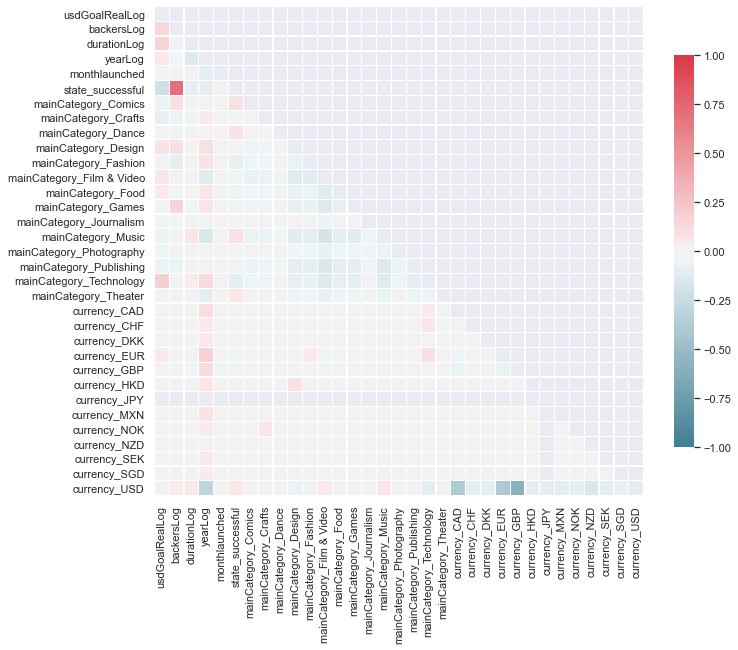

In [49]:
# Set the style of the visualization
sns.set(style="dark")

# Create a covariance matrix
corr = kick5k.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1,square=True, linewidths=.2, cbar_kws={"shrink": .8});

In [50]:
kick5k.describe()

,usdGoalRealLog,backersLog,durationLog,yearLog,monthlaunched,state_successful,mainCategory_Comics,mainCategory_Crafts,mainCategory_Dance,mainCategory_Design,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.559811,2.767158,3.485142,7.608467,6.382400,0.405600,0.02820,0.023800,0.013200,0.072000,...,0.041600,0.089800,0.002600,0.0,0.003400,0.003000,0.006200,0.003800,0.001400,0.780000
std,1.661975,1.908499,0.371295,0.000948,3.319936,0.491057,0.16556,0.152441,0.114142,0.258514,...,0.199693,0.285924,0.050929,0.0,0.058216,0.054696,0.078503,0.061533,0.037394,0.414288
min,0.693147,0.000000,0.693147,7.605890,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.601402,1.098612,3.433987,7.607878,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.517393,2.772589,3.433987,7.608374,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.615872,4.174387,3.610918,7.609367,9.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,17.822844,11.425034,4.521789,7.609862,12.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.5. Setting the X and y variables

In [51]:
# We will use the data frame

y = kick5k['state_successful'].values
X = kick5k.drop(columns = ['state_successful'])
print(y)

# Scaling the data
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[0 1 0 ... 1 1 0]


# Part 3: Model 

In this section, four different machine learning models for classification will be applied to the data, in order to create a model to classify projects into successes and failures. There are: <br>

- Logistic Regression (LR) <br>
- Support Vector Machine (SVC)<br>
- K-Nearest Neighbors (KNN)<br>
- Random Forest  (RF)

The two categories are of a roughly equal size, so no measures need to be taken to adjust for imbalanced classes.

It is good practice to choose an evaluation method before running machine learning models - not after. The weighted average F1 score was chosen. The F1 score calculates the harmonic mean between precision and recall, and is a suitable measure because there is no preference for false positives or false negatives in this case (both are equally bad). The weighted average will be used because the classes are of slightly different sizes, and we want to be able to predict both successes and failures.

Based on the F1_score, the final model is **Logistic Regression**.<br>

We focus more one winning model and optimize the performance of the Logistic Regression. Then, we evaluate the model. For the eaiser concerntration, we arrange the LR as the first part of Part 3.

## (1) LOGISTIC REGRESSION (The Selected Model)

In [52]:
# Recursive Feature Elimininaition
X_scaled = preprocessing.scale(X_train)

lr = LogisticRegression()

rfe = RFE(lr,n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y_train) 

#fits it to the multiple linear regression and transforms X
lr.fit(X_rfe, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False False False  True False
  True False  True False False False False False False False False False
 False False False False False False False False]
[ 1  1  7 18 26  5 12  2  8 10  1  9  1  4  1 21 20 11  3 15 17 14 25 19
 24 28 27 22  6 13 16 23]


In [53]:
lr2 = LogisticRegression()
rfeCV = RFECV(lr2)

rfeCV.fit_transform(X_scaled, y_train)
print("Optimal number of input variables: ", rfeCV.n_features_)

Optimal number of input variables:  7


### 3.1.1. Logistic Regression features of importance

In [54]:
print(rfeCV.ranking_)
lr2_features = pd.DataFrame()
lr2_features['ranking'] = pd.Series(rfeCV.ranking_)
lr2_features['variables'] = X_train.columns
lr2_features = lr2_features[lr2_features['ranking']== 1]
X_features = lr2_features.variables.values.tolist()
lr2_features

[ 1  1  5 16 24  3 10  1  6  8  1  7  1  2  1 19 18  9  1 13 15 12 23 17
 22 26 25 20  4 11 14 21]


,ranking,variables
0,1,usdGoalRealLog
1,1,backersLog
7,1,mainCategory_Dance
10,1,mainCategory_Film & Video
12,1,mainCategory_Games
14,1,mainCategory_Music
18,1,mainCategory_Theater


In [55]:
# Now that we have our 7 features, 
# We'll re-set the X-variable to only contain the values in the list
# X_features = ['usdGoalRealLog', 'backersLog', 'mainCategory_Dance', 'mainCategory_Film & Video', 'mainCategory_Games', 'mainCategory_Music', 'mainCategory_Theater']

X = X[X_features]
print(X)

# Scaling the data
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


      usdGoalRealLog  backersLog  mainCategory_Dance  \
0           0.570354    0.257718                 0.0   
1           0.309452    0.318387                 0.0   
2           0.416312    0.121338                 0.0   
3           0.228958    0.182007                 0.0   
4           0.520892    0.509415                 1.0   
...              ...         ...                 ...   
4995        0.561355    0.140869                 0.0   
4996        0.433042    0.096158                 0.0   
4997        0.362856    0.257718                 0.0   
4998        0.456765    0.469668                 0.0   
4999        0.801146    0.096158                 0.0   

      mainCategory_Film & Video  mainCategory_Games  mainCategory_Music  \
0                           1.0                 0.0                 0.0   
1                           0.0                 0.0                 0.0   
2                           0.0                 0.0                 0.0   
3                          

In [56]:
# Checking the variance inflation factor
vif_table = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], columns = [vif], index = X.columns)
vif_table

,<function variance_inflation_factor at 0x0000014365AE4310>
usdGoalRealLog,3.584464
backersLog,3.200713
mainCategory_Dance,1.023016
mainCategory_Film & Video,1.291780
mainCategory_Games,1.184031
mainCategory_Music,1.224313
mainCategory_Theater,1.048023


In [57]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1.2. Evaluate performance of default model

Accuracy of the Logistic Regression model  : 0.9120
Precision of the Logistic Regression model : 0.9121
Recall of the Logistic Regression model    : 0.8828
F1 Score of the Logistic Regression model  : 0.8972


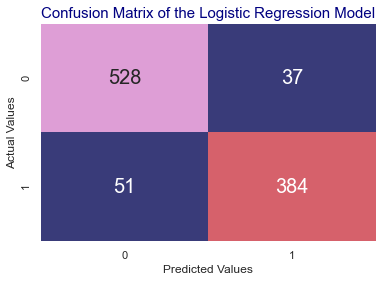

In [58]:
# Instantiate new logistic regression, fit our model, and evaluate performance:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr_prob = lr.predict_proba(X_test)
y_pred_lr_prob

print('Accuracy of the Logistic Regression model  : %.4f' % accuracy_score(y_test, y_pred_lr))
print('Precision of the Logistic Regression model : %.4f' % precision_score(y_test, y_pred_lr))
print('Recall of the Logistic Regression model    : %.4f' % recall_score(y_test, y_pred_lr))
print('F1 Score of the Logistic Regression model  : %.4f' % f1_score(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='tab20b')
plt.title('Confusion Matrix of the Logistic Regression Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

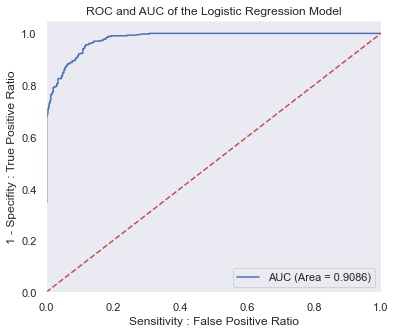

In [59]:
logit_roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_prob[:,1])

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_lr)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the Logistic Regression Model')
plt.legend()
plt.show()

In [60]:
# Logistic Regression Classification Report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       565
           1       0.91      0.88      0.90       435

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



AxesSubplot(0.125,0.125;0.775x0.755)


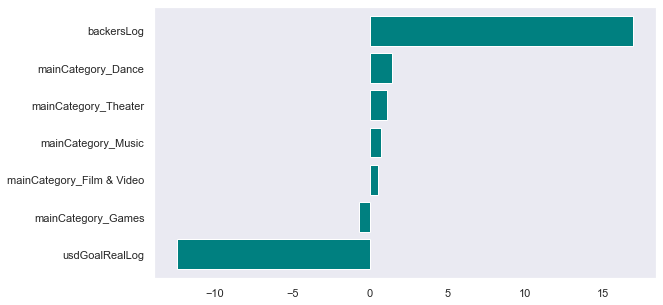

In [61]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0], index=X_train.columns.values)
print(weights.sort_values(ascending = True)[:10].plot(kind='barh',
                                                      figsize=(9, 5),color ='teal',zorder=4, width=0.8))

#### *This step is for our reviewing and discovering purpose only. These steps are to understand and visualize how different data distributions look like* 
- Noise Levels
- Imbalance
- Test binary classifiers performance

#### *Adding Noise*
Here we will use the parameter flip_y to add additional noise. This can be used to test if our classifiers will work well after added noise or not. In case we have real world noisy data (say from IOT devices), and a classifier that doesn’t work well with noise, then our accuracy is going to suffer.

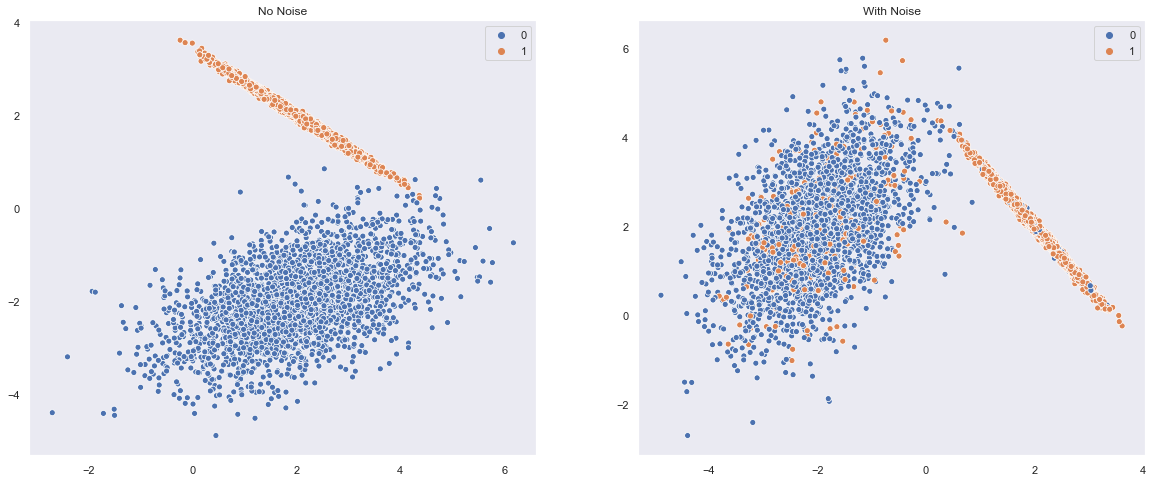

In [62]:
# Generate Clean data
X,y = make_classification(n_samples=5000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=42)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
# Generate noisy Data
X,y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=42)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("With Noise");
plt.show();

#### *Using Class separation*
Changing class separation changes the difficulty of the classification task. The data points no longer remain easily separable in case of lower class separation.

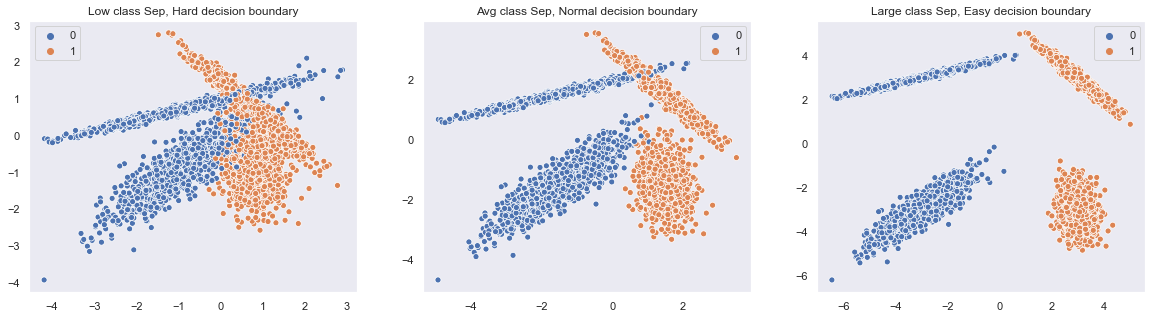

In [63]:
# Low class Sep, Hard decision boundary
X,y = make_classification(n_samples=5000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("Low class Sep, Hard decision boundary");
# Avg class Sep, Normal decision boundary
X,y = make_classification(n_samples=5000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=1.5,flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Avg class Sep, Normal decision boundary");
# Large class Sep, Easy decision boundary
X,y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=3,flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax3);
ax3.set_title("Large class Sep, Easy decision boundary");
plt.show();

#### *Test binary classifiers performance*
Changing class separation changes the difficulty of the classification task. The data points no longer remain easily separable in case of lower class separation.

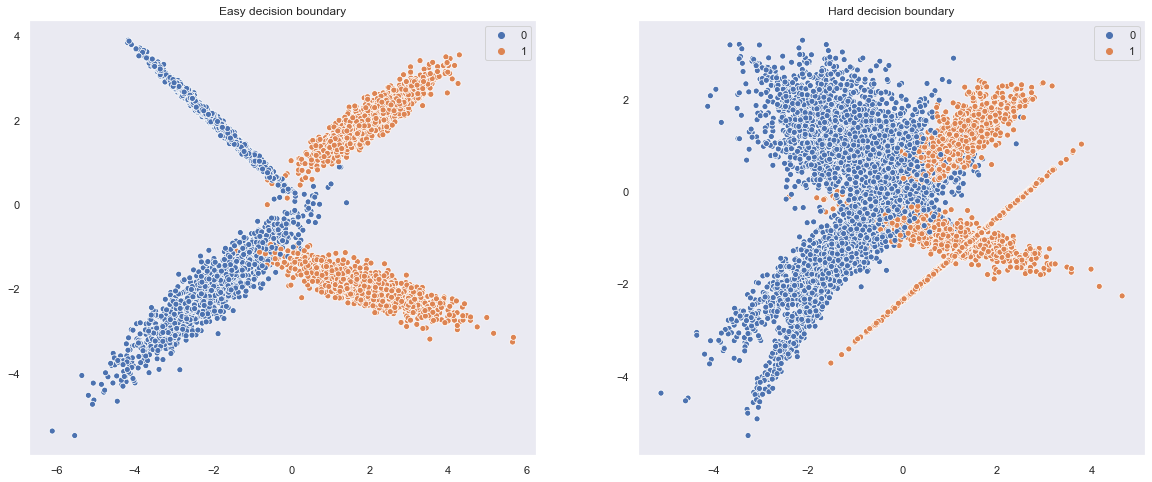

In [64]:
# Easy decision boundary
X1,y1 = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=42)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X1[:,0],X1[:,1],hue=y1,ax=ax1);
ax1.set_title("Easy decision boundary");
# Hard decision boundary
X2,y2 = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=1,flip_y=0,weights=[0.7,0.3], random_state=42)
X2a,y2a = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=1.25,flip_y=0,weights=[0.8,0.2], random_state=93)
X2 = np.concatenate((X2,X2a))
y2 = np.concatenate((y2,y2a))
sns.scatterplot(X2[:,0],X2[:,1],hue=y2,ax=ax2);
ax2.set_title("Hard decision boundary");
X1,y1 = pd.DataFrame(X1),pd.Series(y1)
X2,y2 = pd.DataFrame(X2),pd.Series(y2)

In [65]:
# Look at parameters used by our current logistic regression model
print('Parameters currently in use:\n')
pprint(lr.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### 3.1.3. Logistic regression with parameter optimization

The logistic regression model can potentially be further improved by optimizing its parameters. GridSearchCV can be used to test multiple different regularization parameters (values of C), penalties (l1 or l2) and models with and without an intercept.

In [66]:
# Using GridSearchCV to test multiple different parameters
pipe_lr = Pipeline([('clf', LogisticRegression())])

params_lr = [
    {'clf__penalty': ['l2'],
     'clf__fit_intercept': [True, False],
        'clf__C': [0.001, 0.01, 1, 10]
    }
]

grid_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=params_lr,
                  cv=5)

grid_lr.fit(X_train, y_train)

lr_best_score = grid_lr.best_score_
lr_best_params = grid_lr.best_params_

print("Best accuracy:", round(lr_best_score,2))
print("Best parameters:", lr_best_params)

Best accuracy: 0.93
Best parameters: {'clf__C': 10, 'clf__fit_intercept': True, 'clf__penalty': 'l2'}


Results from the logistic regression parameter optimization:

Best accuracy: 0.93<br>
Best parameters: {'clfC': 10, 'clffit_intercept': True, 'clf__penalty': 'l2'}

Accuracy of the Logistic Regression model  : 0.9170
Precision of the Logistic Regression model : 0.9211
Recall of the Logistic Regression model    : 0.8851
F1 Score of the Logistic Regression model  : 0.9027


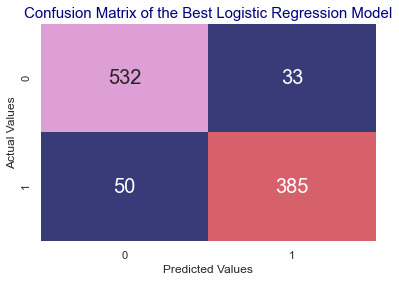

In [67]:
lrbest = Pipeline([('clf', LogisticRegression(C=10, fit_intercept=True, penalty='l2'))])
lrbest.fit(X_train, y_train)
y_pred_lrbest = lrbest.predict(X_test)
y_pred_lrbest_prob = lrbest.predict_proba(X_test)
y_pred_lrbest_prob

print('Accuracy of the Logistic Regression model  : %.4f' % accuracy_score(y_test, y_pred_lrbest))
print('Precision of the Logistic Regression model : %.4f' % precision_score(y_test, y_pred_lrbest))
print('Recall of the Logistic Regression model    : %.4f' % recall_score(y_test, y_pred_lrbest))
print('F1 Score of the Logistic Regression model  : %.4f' % f1_score(y_test, y_pred_lrbest))

sns.heatmap(confusion_matrix(y_test, y_pred_lrbest), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='tab20b')
plt.title('Confusion Matrix of the Best Logistic Regression Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

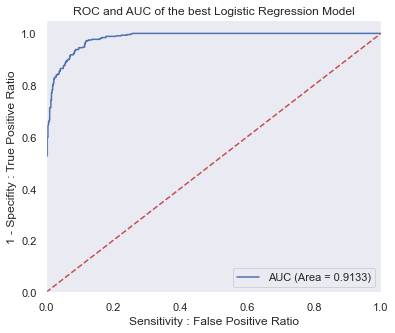

In [68]:
logit_roc_auc_lrbest = roc_auc_score(y_test, y_pred_lrbest)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrbest_prob[:,1])

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_lrbest)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the best Logistic Regression Model')
plt.legend()
plt.show()

In [69]:
# Logistic regression model Classification Report
print(classification_report(y_test, y_pred_lrbest))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       565
           1       0.92      0.89      0.90       435

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.92      0.92      0.92      1000



**After hyperparameter tuning, the model's F1 score is higher than the logistic regression model using default parameters**

### 3.1.4. Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

We will plot learning curves where I illustrate the relationship between the accuracy score and the cross-validation score for increasing sample sizes. We will do this to make sure that we are not overfitting the training data. We want a learning curve where the validation score gets close to converging with the training score but does not quite converge.

We can use the function learning_curve to generate the values that are required to plot such a learning curve (number of samples that have been used, the average scores on the training sets and the average scores on the validation sets).

Source: https://scikit-learn.org/

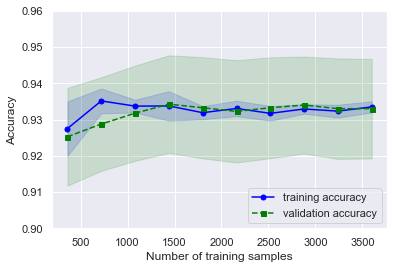

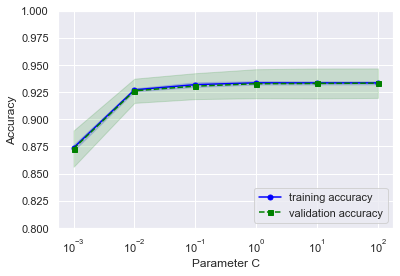

In [70]:
# Learning curve for train set size
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(C=10, fit_intercept=True, penalty='l2'))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 0.96])
plt.show()


# Learning curve for regularization parameter
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                             param_name='logisticregression__C', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.show()

Using a sample size below 1500 tends to overfit. Adding more training samples does not appear to be beneficial past n=2000. Our sample selection of 5000 is more than adequate. 

### 3.1.5. Cross Validation

In [71]:
clf_score = cross_val_score(lr, X_train, y_train, cv=3)
print(clf_score)
print(clf_score.mean())
print('Cross Validation of the Logistic Regression model with default Folds  : %.4f' % clf_score.mean())

[0.92503748 0.91372843 0.93098275]
0.9232495530179397
Cross Validation of the Logistic Regression model with default Folds  : 0.9232


In [72]:
clf_score_best = cross_val_score(lrbest, X_train, y_train, cv=3)
print(clf_score_best)
print(clf_score_best.mean())
print('Cross Validation of the best Logistic Regression model with default Folds  : %.4f' % clf_score_best.mean())

[0.93703148 0.92123031 0.93098275]
0.9297481791737289
Cross Validation of the best Logistic Regression model with default Folds  : 0.9297


In [73]:
# 5 Folds Cross Validation 
kfold5 = KFold(n_splits=5)
clf_score_k5 = cross_val_score(lrbest, X_train, y_train, cv=kfold5, scoring='accuracy')
print(clf_score_k5)
clf_score_k5.mean()
print('Cross Validation of the best Logistic Regression model with 5 Folds   : %.4f' % clf_score_k5.mean())

[0.93625 0.935   0.92375 0.9325  0.9325 ]
Cross Validation of the best Logistic Regression model with 5 Folds   : 0.9320


In [74]:
# 7 Folds Cross Validation 
kfold7 = KFold(n_splits=7)
clf_score_k7 = cross_val_score(lrbest, X_train, y_train, cv=kfold7, scoring='accuracy')
print(clf_score_k7)
clf_score_k7.mean()
print('Cross Validation of the best Logistic Regression model with 7 Folds   : %.4f' % clf_score_k7.mean())

[0.93181818 0.93531469 0.92307692 0.93169877 0.92994746 0.92469352
 0.9474606 ]
Cross Validation of the best Logistic Regression model with 7 Folds   : 0.9320


In [75]:
# 10 Folds Cross Validation 
kfold10 = KFold(n_splits=10)
clf_score_k10 = cross_val_score(lrbest, X_train, y_train, cv=kfold10, scoring='accuracy')
print(clf_score_k10)
clf_score_k10.mean()
print('Cross Validation of the best Logistic Regression model with 10 Folds   : %.4f' % clf_score_k10.mean())

[0.9275 0.94   0.93   0.9375 0.9075 0.94   0.9325 0.935  0.9175 0.95  ]
Cross Validation of the best Logistic Regression model with 10 Folds   : 0.9317


### 3.1.6. New predictions with 0.4 threshold

In [76]:
# New predictions with 0.3 threshold:
y_pred_4 = lrbest.predict_proba(X_test)[:,1] >= 0.4
y_pred_3 = lrbest.predict_proba(X_test)[:,1] >= 0.3

In [77]:
print('Accuracy of the default model             : %.4f' % accuracy_score(y_test, y_pred_lrbest))
print('Precision of the default model            : %.4f' % precision_score(y_test,y_pred_lrbest))
print('Recall of the default model               : %.4f' % recall_score(y_test, y_pred_lrbest))
print('F1 Score of the default model             : %.4f' % f1_score(y_test, y_pred_lrbest))
print('--'*24)
print('Accuracy of the model with 0.4 threshold  : %.4f' % accuracy_score(y_test, y_pred_4))
print('Precision of the model with 0.4 threshold : %.4f' % precision_score(y_test, y_pred_4))
print('Recall of the model with 0.4 threshold    : %.4f' % recall_score(y_test, y_pred_4))
print('F1 Score of the model with 0.4 threshold  : %.4f' % f1_score(y_test, y_pred_4))
print('--'*24)
print('Accuracy of the model with 0.3 threshold  : %.4f' % accuracy_score(y_test, y_pred_3))
print('Precision of the model with 0.3 threshold : %.4f' % precision_score(y_test, y_pred_3))
print('Recall of the model with 0.3 threshold    : %.4f' % recall_score(y_test, y_pred_3))
print('F1 Score of the model with 0.3 threshold  : %.4f' % f1_score(y_test, y_pred_3))



Accuracy of the default model             : 0.9170
Precision of the default model            : 0.9211
Recall of the default model               : 0.8851
F1 Score of the default model             : 0.9027
------------------------------------------------
Accuracy of the model with 0.4 threshold  : 0.9190
Precision of the model with 0.4 threshold : 0.8951
Recall of the model with 0.4 threshold    : 0.9218
F1 Score of the model with 0.4 threshold  : 0.9083
------------------------------------------------
Accuracy of the model with 0.3 threshold  : 0.9140
Precision of the model with 0.3 threshold : 0.8689
Recall of the model with 0.3 threshold    : 0.9448
F1 Score of the model with 0.3 threshold  : 0.9053


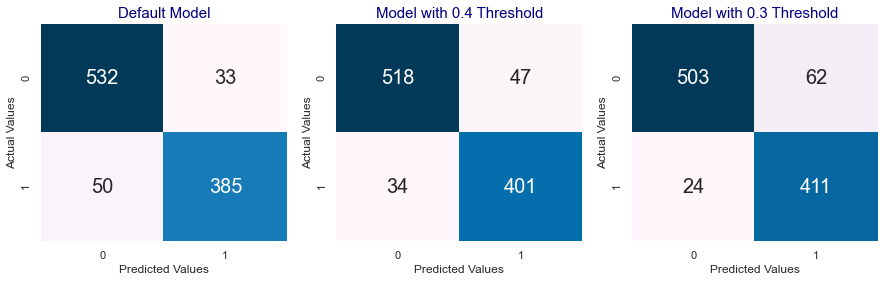

In [78]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lrbest), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Default Model', color='navy', fontsize=15)

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Model with 0.4 Threshold', color='navy', fontsize=15)

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Model with 0.3 Threshold', color='navy', fontsize=15);

In [79]:
# We can get each number from confusion matrix with .ravel()
TrueNeg, FalsePos, FalseNeg, TruePos =confusion_matrix(y_test, y_pred_4).ravel()
print("True Negative  :", TrueNeg)
print("False Positive :", FalsePos)
print("False Negative :", FalseNeg)
print("True Positive  :", TruePos)

True Negative  : 518
False Positive : 47
False Negative : 34
True Positive  : 401


In [80]:
# Let's look error rates
# First, going to find the total number of successful and failed
totsuccessful = y_test.sum()
totfail = len(y_test) - y_test.sum()
print("# of Successful Projects:", totsuccessful)
print("# of Fail Projects :", totfail)

# of Successful Projects: 435
# of Fail Projects : 565


### 3.1.7. Evaluate performance of the best model

In [81]:
# Let’s take a look at the metrics classification report:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       565
           1       0.90      0.92      0.91       435

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



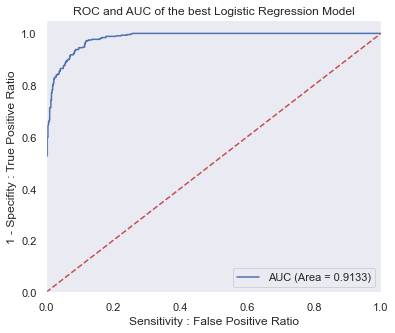

In [82]:
logit_roc_auc_lr4 = roc_auc_score(y_test, y_pred_4)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrbest_prob[:,1])

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_lrbest)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the best Logistic Regression Model')
plt.legend()
plt.show()

In [83]:
# Error rate for Failed is "false positives / total Fails"
print("Error rate for Fail Projects:", "{:.2%}".format(FalsePos/totfail))
# Accuracy for Failed is "true negatives / total Fails"
print("Accuracy for Fail Projects :", "{:.2%}".format(TrueNeg/totfail))

Error rate for Fail Projects: 8.32%
Accuracy for Fail Projects : 91.68%


In [84]:
# Error rate for Successful = false negatives / total Successful
print("Error rate for Successful Projects:", "{:.2%}".format(FalseNeg/totsuccessful))
# Accuracy for Successful = true positives / total Successful
print("Accuracy for Successful Projects:  ", "{:.2%}".format(TruePos/totsuccessful))

Error rate for Successful Projects: 7.82%
Accuracy for Successful Projects:   92.18%


In [85]:
# Look at the overall error rate and accuracy
# Total misclassifications / total number of chances (sample size)
print("Overall Error Rate:", "{:.2%}".format((FalseNeg+FalsePos)/len(y_test)))
# Total correct classifications / total number of chances (sample size)
print("Overall Accuracy :", "{:.2%}".format((TrueNeg+TruePos)/len(y_test)))

Overall Error Rate: 8.10%
Overall Accuracy : 91.90%


Predicting non-successful Kickstarters is more accurate than predicting successful kickstarters and success is the only feature correlated with any other feature.
There is also a slight class imbalance between failed and successful

## (2) SUPPORT VECTOR MACHINES

In [86]:
# Let’s define a support vector classification object, fit our model, and evaluate performance:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

Accuracy of the Support Vector Regression model  : 0.9140
Precision of the Support Vector Regression model : 0.9087
Recall of the Support Vector Regression model    : 0.8920
F1 Score of the Support Vector Regression model  : 0.9002


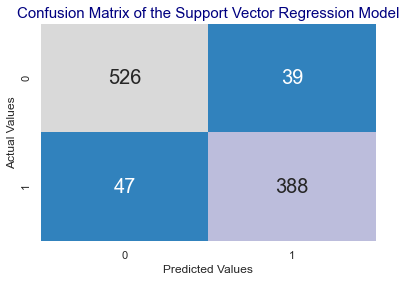

In [87]:
print('Accuracy of the Support Vector Regression model  : %.4f' % accuracy_score(y_test, y_pred_svc))
print('Precision of the Support Vector Regression model : %.4f' % precision_score(y_test, y_pred_svc))
print('Recall of the Support Vector Regression model    : %.4f' % recall_score(y_test, y_pred_svc))
print('F1 Score of the Support Vector Regression model  : %.4f' % f1_score(y_test, y_pred_svc))

sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='tab20c')
plt.title('Confusion Matrix of the Support Vector Regression Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

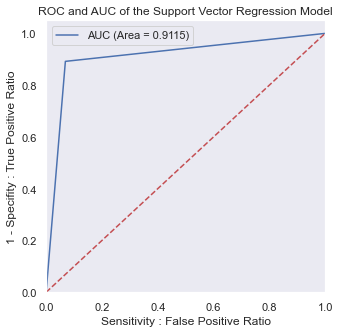

In [88]:
# SVC ROC 
logit_roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_svc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the Support Vector Regression Model')
plt.legend()
plt.show()

In [89]:
# SVC Classification Report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       565
           1       0.91      0.89      0.90       435

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [90]:
# Defining parameter range for GirdSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.891, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.905, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.915, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.851, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.845, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.855, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.919, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.910, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.920, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.917, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.930, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.845, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.851, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.925, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.932, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.920, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.910, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.920, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.917, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   36.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [91]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


Accuracy of the best Support Vector Regression model  : 0.9170
Precision of the best Support Vector Regression model : 0.9231
Recall of the best Support Vector Regression model    : 0.8828
F1 Score of the best Support Vector Regression model  : 0.9025


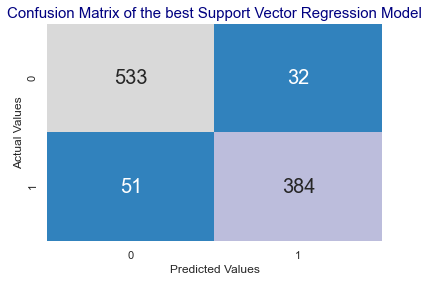

In [92]:
# Run the best parameters for SVC
svcbest = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svcbest.fit(X_train, y_train)
y_pred_svcbest = svcbest.predict(X_test)

print('Accuracy of the best Support Vector Regression model  : %.4f' % accuracy_score(y_test, y_pred_svcbest))
print('Precision of the best Support Vector Regression model : %.4f' % precision_score(y_test, y_pred_svcbest))
print('Recall of the best Support Vector Regression model    : %.4f' % recall_score(y_test, y_pred_svcbest))
print('F1 Score of the best Support Vector Regression model  : %.4f' % f1_score(y_test, y_pred_svcbest))

sns.heatmap(confusion_matrix(y_test, y_pred_svcbest), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='tab20c')
plt.title('Confusion Matrix of the best Support Vector Regression Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');


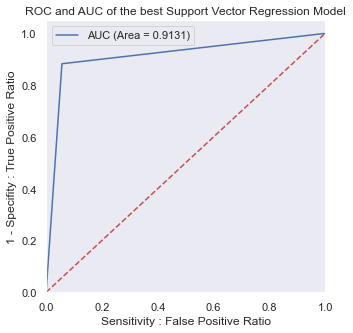

In [93]:
# Display ROC for best SVC
logit_roc_auc_svcbest = roc_auc_score(y_test, y_pred_svcbest)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svcbest)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_svcbest)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the best Support Vector Regression Model')
plt.legend()
plt.show()

After hyperparameter tuning, the model's F1 score is lower than the SCV model using default parameters to 90.38 from 90.33.


# (3) K-NEAREST NEIGHBORS

In [94]:
# Define a k-nearest neighbor classification object, fit our model, and evaluate performance:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)
y_pred_knn_prob

array([[0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ]])

Accuracy of the K-nearest neighbors model  : 0.9060
Precision of the K-nearest neighbors model : 0.9050
Recall of the K-nearest neighbors model    : 0.8759
F1 Score of the K-nearest neighbors model  : 0.8902


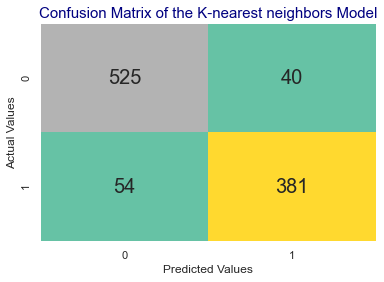

In [95]:
print('Accuracy of the K-nearest neighbors model  : %.4f' % accuracy_score(y_test, y_pred_knn))
print('Precision of the K-nearest neighbors model : %.4f' % precision_score(y_test, y_pred_knn))
print('Recall of the K-nearest neighbors model    : %.4f' % recall_score(y_test, y_pred_knn))
print('F1 Score of the K-nearest neighbors model  : %.4f' % f1_score(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='Set2')
plt.title('Confusion Matrix of the K-nearest neighbors Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

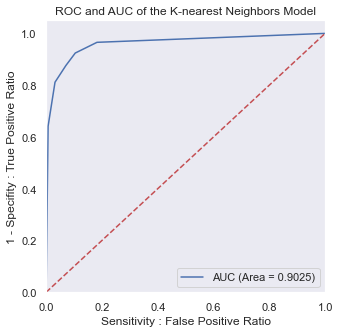

In [96]:
# ROC for KNN
logit_roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_knn)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the K-nearest Neighbors Model')
plt.legend()
plt.show()

In [97]:
# KNN Classification Report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       565
           1       0.90      0.88      0.89       435

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.91      1000



# (4) RANDOM FORESTS

Accuracy of the Random Forest model accuracy for 100 trees  : 0.9020
Precision of the Random Forest model accuracy for 100 trees : 0.9100
Recall of the Random Forest model accuracy for 100 trees    : 0.8598
F1 Score of the Random Forest model accuracy for 100 trees  : 0.8842


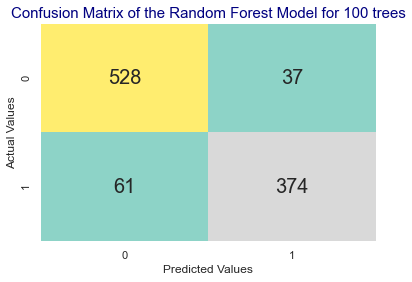

In [98]:
# Random Forest Classifier, n_estimators defualt of 100 tress
rf_initial = RandomForestClassifier()
rf_initial.fit(X_train, y_train)
y_pred_rf_initial = rf_initial.predict(X_test)
y_pred_rf_initial_prob = rf_initial.predict_proba(X_test)
y_pred_rf_initial_prob

print('Accuracy of the Random Forest model accuracy for 100 trees  : %.4f' % accuracy_score(y_test, y_pred_rf_initial))
print('Precision of the Random Forest model accuracy for 100 trees : %.4f' % precision_score(y_test, y_pred_rf_initial))
print('Recall of the Random Forest model accuracy for 100 trees    : %.4f' % recall_score(y_test, y_pred_rf_initial))
print('F1 Score of the Random Forest model accuracy for 100 trees  : %.4f' % f1_score(y_test, y_pred_rf_initial))

sns.heatmap(confusion_matrix(y_test, y_pred_rf_initial), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='Set3')
plt.title('Confusion Matrix of the Random Forest Model for 100 trees', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

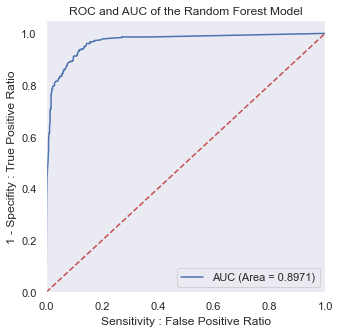

In [99]:
logit_roc_auc_rf_initial = roc_auc_score(y_test, y_pred_rf_initial)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_initial_prob[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_rf_initial)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the Random Forest Model')
plt.legend()
plt.show()

## Examine the Default Random Forest to Determine Parameters¶

In [100]:
rf = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Random Search with Cross Validation

In [101]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [102]:
# WARNING: This is the longest computation for the entire notebook.
# Estimated time to complete: 1.2 minutes
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.9min finished


In [103]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [104]:
rf_random.cv_results_

{'mean_fit_time': array([ 2.74656264, 11.26850096,  7.00905744, 12.50673739, 10.01293405,
         5.10431981,  5.94083079,  4.04296947,  6.71791188, 11.16981387,
         2.61921239,  5.11889672, 10.52825419,  8.54935122,  4.6672434 ,
        10.9595844 ,  3.85303354,  6.64868204,  9.95430239,  3.41953707,
        10.53744419,  9.78343399,  7.92143854, 10.77880899,  8.472356  ,
         2.51895801,  8.34009973,  6.0299023 , 11.74451621,  7.3254141 ,
         6.59350562,  4.56214261,  4.88538384,  4.81483841, 11.53271755,
         5.02619171,  7.3858966 ,  4.98256119,  4.71986008,  5.6342411 ,
         1.11098011,  3.47978735,  4.5955681 ,  2.20311872,  1.15619572,
         6.02410332, 13.49247662,  2.78969121,  6.74420301,  3.55019927,
        13.27884356, 12.88825838,  5.88603473,  5.98204748,  8.25897169,
         3.26743412,  9.14615186, 11.33530267,  9.7712667 ,  8.79186813,
         1.37441079,  2.87543877,  5.97476069,  7.97272452, 10.39997848,
        10.25579015, 10.78368354, 

## Evaluate the best Random Forest Model

In [105]:
best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
y_pred_best_random = best_random.predict(X_test)
y_pred_best_random_prob = best_random.predict_proba(X_test)
y_pred_best_random_prob

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_random.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [106]:
print('Accuracy of the best Random Forest model accuracy   : %.4f' % accuracy_score(y_test, y_pred_best_random))
print('Precision of the best Random Forest model accuracy  : %.4f' % precision_score(y_test, y_pred_best_random))
print('Recall of the Random best Forest model accuracy for : %.4f' % recall_score(y_test, y_pred_best_random))
print('F1 Score of the Random best Forest model accuracy   : %.4f' % f1_score(y_test, y_pred_best_random))

Accuracy of the best Random Forest model accuracy   : 0.9070
Precision of the best Random Forest model accuracy  : 0.9052
Recall of the Random best Forest model accuracy for : 0.8782
F1 Score of the Random best Forest model accuracy   : 0.8915


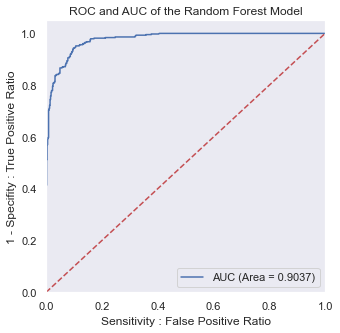

In [107]:
logit_roc_auc_best_random = roc_auc_score(y_test, y_pred_best_random)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_random_prob[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC (Area = %0.4f)' %logit_roc_auc_best_random)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the Random Forest Model')
plt.legend()
plt.show()

### Confusion matrix

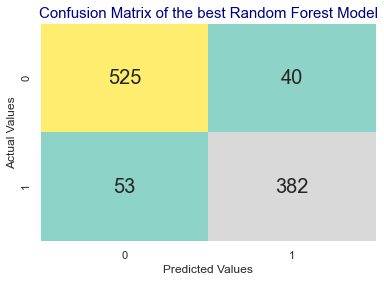

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred_best_random), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='Set3')
plt.title('Confusion Matrix of the best Random Forest Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [109]:
# Let’s take a look at the metrics classification report:
print(classification_report(y_test, y_pred_best_random))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       565
           1       0.91      0.88      0.89       435

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000



### Cross Validation

In [110]:
clf_score_rf = cross_val_score(rf, X_train, y_train, cv=3)
print(clf_score_rf)
print(clf_score_rf.mean())
print('Cross Validation of the Random Forest model with default Folds  : %.4f' % clf_score_rf.mean())

[0.91904048 0.90922731 0.92573143]
0.9179997398150137
Cross Validation of the Random Forest model with default Folds  : 0.9180


In [111]:
clf_score_rf_3k = cross_val_score(best_random, X_train, y_train, cv=3)
print(clf_score_rf_3k)
print(clf_score_rf_3k.mean())
print('Cross Validation of the Random Forest model with default Folds  : %.4f' % clf_score_rf_3k.mean())

[0.93328336 0.92048012 0.93698425]
0.9302492414707876
Cross Validation of the Random Forest model with default Folds  : 0.9302


In [112]:
# 10 Folds Cross Validation 
kfold = KFold(n_splits=10)
clf_score_rf_k10 = cross_val_score(best_random, X_train, y_train, cv=kfold, scoring='accuracy')
print(clf_score_rf_k10)
clf_score_rf_k10.mean()
print('Cross Validation of the Random Forest model with 10 Folds   : %.4f' % clf_score_rf_k10.mean())

[0.93   0.9375 0.9275 0.93   0.9    0.9325 0.9275 0.935  0.9175 0.935 ]
Cross Validation of the Random Forest model with 10 Folds   : 0.9273


### The feature importance

In [113]:
feature_df = pd.DataFrame({'Importance':best_random.feature_importances_, 'Features': features })
print(feature_df)

   Importance                   Features
0    0.176907             usdGoalRealLog
1    0.798239                 backersLog
2    0.004401         mainCategory_Dance
3    0.003795  mainCategory_Film & Video
4    0.004059         mainCategory_Games
5    0.008114         mainCategory_Music
6    0.004486       mainCategory_Theater


In [114]:
rf_clf_features = pd.DataFrame(best_random.feature_importances_)
rf_clf_features["Feature"] = list(X_train) 
rf_clf_features.sort_values(by=0, ascending=False).head()

,0,Feature
1,0.798239,backersLog
0,0.176907,usdGoalRealLog
5,0.008114,mainCategory_Music
6,0.004486,mainCategory_Theater
2,0.004401,mainCategory_Dance


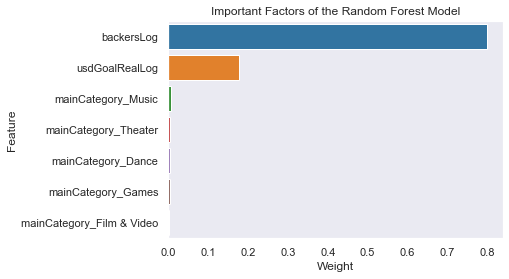

In [115]:
g = sns.barplot(0,"Feature",data = rf_clf_features.sort_values(by=0, ascending=False)[0:10], palette="tab10",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Important Factors of the Random Forest Model")

The graph above shows **the feature importances** for the model:
- **Backers** is the most important feature followed by **goal size**

# Conclusions and recommendations

The final and best model is Logistic Regression, it is best at predicting the odds of a project either failing or succeeding.

Since we are using 'backers' as a variable, this model would ideally be run continously throughout a project's duration. When used before a project launch, with backers = 0, the USD Goal variable will pull the odds of a project to 'failing' until it gains enough backers. This can still be useful as we can plug in possible values for backers to find the ideal number to swing the project's odds more to succeeding.

Further, we can run the model on a periodic schedule for live projects and provide odds for success. At these checkpoint dates, we can identify projects that are likely to fail early and allocate resources to promote the project.  

#### Application
Instead of outright classification, this problem was best tackled with probabilities due to the nature of the question: What makes a project successful? Intuitively, no project on kickstarter is a guaranteed success, but there are ones that are more likely to succeed before project launch: those with moderate goals and are performance arts-focused. 

As a project launches and attracts backers, a threshold is reached due to the number of backers and the probability of success becomes greater than failure. The model also puts more weight on backers, so a one unit change in backers (log), holding every else constant, increases the odds of success by a greater margin than the negative impact of USD goal (log). Projects that are not performance focused, couple with excessively high goals, are starting the race farther from the finish line. Running this model before a project launch can tell us how much disadvantage a project has incurred and project the number of backers it will take to overcome those disadvantages.

Further, we can run the model on a periodic schedule for live projects and provide odds for success. At these checkpoint dates, we can identify projects that are likely to fail early and allocate resources to promote the project, either through adjustment of the marketing strategy or a re-evaluation of project goals.  

### END